In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from MLCode.KCrossVal import kFoldCross
from MLCode.utils import load_shuffled_cup, np_cup_TR, plot_NN_TR_VAL

In [2]:
df = load_shuffled_cup()
X_dev, Y_dev = np_cup_TR(df, test=False)

alpha = np.linspace(0.01, 10, 100)
results = []
for a in alpha:
    reg = linear_model.Ridge(alpha=a)
    res = kFoldCross(reg.fit, reg.predict, X_dev, Y_dev, 5, out_scaler=True)
    res = a, res[0], res[1], res[2]
    results.append(res)

df = pd.DataFrame(results, columns=['alpha', 'MEE_Val_mean', 'MEE_Val_std', 'MEE_Tr_mean'])

In [3]:
df.sort_values(by=['MEE_Val_mean']).head()

,alpha,MEE_Val_mean,MEE_Val_std,MEE_Tr_mean
61,6.165455,5.239062,0.088420,5.201268
62,6.266364,5.239062,0.088422,5.201280
60,6.064545,5.239062,0.088417,5.201256
63,6.367273,5.239062,0.088425,5.201292
59,5.963636,5.239062,0.088414,5.201245


<AxesSubplot:xlabel='alpha'>

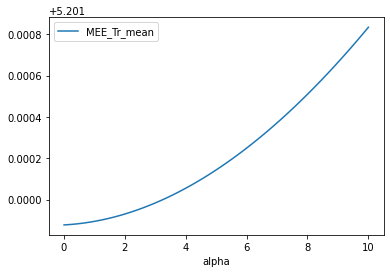

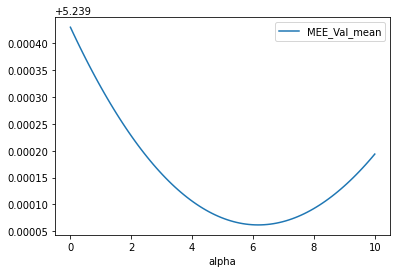

In [6]:
df.plot(x='alpha', y='MEE_Tr_mean')
df.plot(x='alpha', y='MEE_Val_mean')